# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
betas_cols = list(np.arange(start=3, stop=28, step=1))

In [4]:
posteriors = pd.read_csv(os.path.join(results_path, 'entirefit_shared_revised.csv'), usecols=betas_cols)
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [11]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,0.026934,0.021910,0.029151,0.027400,0.025472,0.022566,0.025601,0.020992,0.025605,0.023290,...,0.025931,0.025359,0.028109,0.025725,0.024032,0.023873,0.025921,0.024324,0.019239,0.029421
1,0.024305,0.025058,0.025245,0.032358,0.025497,0.027512,0.021652,0.029929,0.021128,0.026201,...,0.029583,0.025313,0.023527,0.023067,0.025303,0.027870,0.030581,0.029245,0.019260,0.025727
2,0.027917,0.030227,0.025400,0.025916,0.023128,0.030985,0.023651,0.020772,0.027681,0.026870,...,0.025204,0.028436,0.027698,0.020401,0.023168,0.030379,0.026337,0.021919,0.025028,0.030401
3,0.029104,0.022408,0.025132,0.028169,0.022117,0.028848,0.027405,0.024495,0.034018,0.025967,...,0.023637,0.025663,0.028143,0.023594,0.026688,0.027538,0.033622,0.030389,0.022266,0.028368
4,0.023937,0.028519,0.028560,0.026403,0.020160,0.028675,0.032252,0.029043,0.023093,0.032446,...,0.026245,0.027424,0.027044,0.026987,0.022643,0.025401,0.026502,0.024512,0.027230,0.023752
5,0.030846,0.027743,0.020292,0.024817,0.026665,0.030045,0.021108,0.024106,0.029001,0.030257,...,0.023344,0.025431,0.032284,0.024343,0.028716,0.025515,0.027318,0.028884,0.025056,0.027561
6,0.025897,0.023864,0.024689,0.030508,0.025465,0.030669,0.023913,0.026358,0.031999,0.028302,...,0.030457,0.030040,0.029842,0.024740,0.027772,0.024136,0.026105,0.027706,0.026297,0.026552
7,0.029575,0.033448,0.029272,0.024708,0.030317,0.032690,0.030898,0.027828,0.031057,0.023336,...,0.021628,0.024619,0.024828,0.029650,0.026091,0.028083,0.030183,0.028654,0.034879,0.026730
8,0.025073,0.027649,0.027478,0.031805,0.028551,0.028307,0.025622,0.025564,0.026107,0.024264,...,0.030357,0.029593,0.033999,0.025846,0.027028,0.024567,0.023659,0.022713,0.029802,0.029759
9,0.025821,0.027905,0.028167,0.030387,0.029754,0.030035,0.029847,0.023417,0.025429,0.024866,...,0.030001,0.028659,0.033121,0.024770,0.029258,0.024221,0.024325,0.022469,0.030319,0.029515


In [5]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [6]:
param_short = parameters.iloc[:900]

In [7]:
param_short.describe()

,LOG_STELLAR_MASS,Z
count,900.000000,900.000000
mean,10.000000,0.208120
std,0.597259,0.083724
min,9.000000,0.067940
25%,9.482759,0.135613
50%,10.000000,0.208120
75%,10.517241,0.280627
max,11.000000,0.348300


# Posteriors

In [8]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3']*5
figsize      = (20, 20)
alpha        = 0.4

In [9]:
columns = list(posteriors.keys())

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


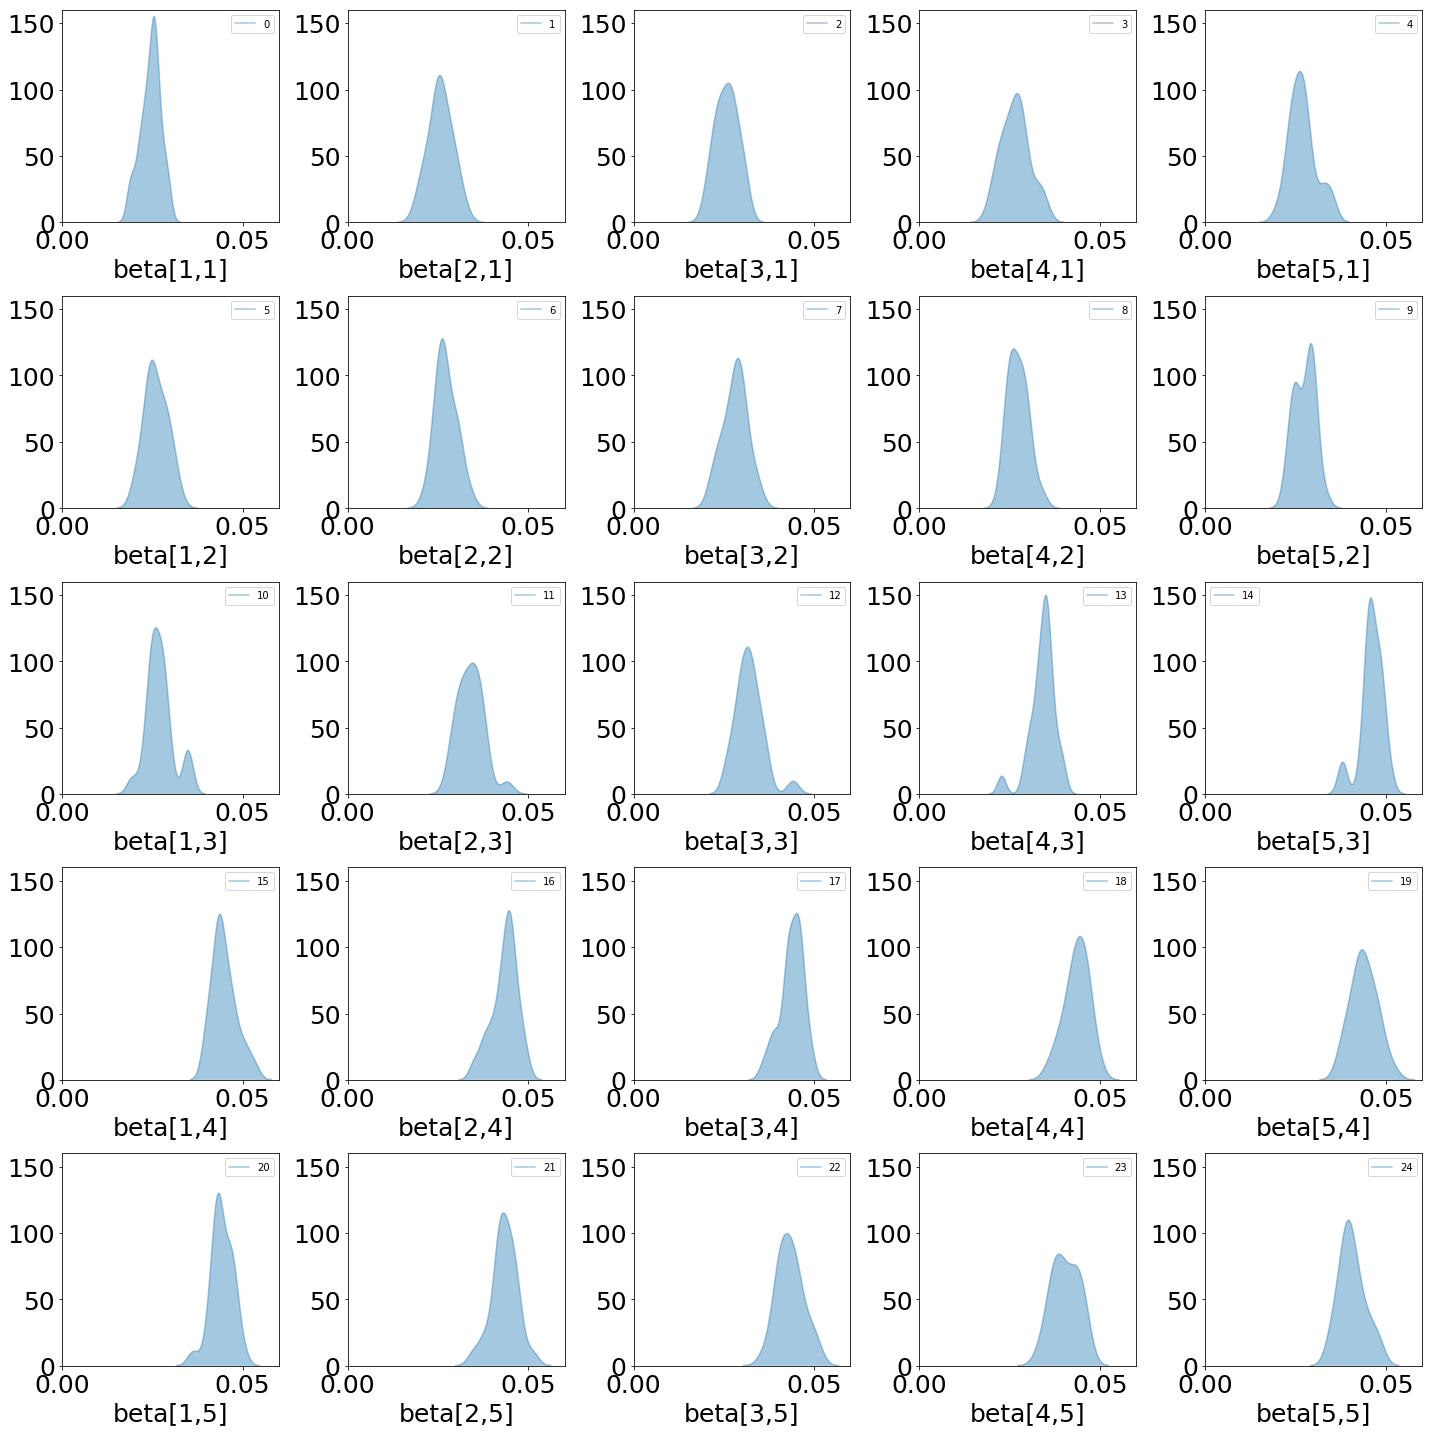

In [10]:
plt.subplots(figsize=figsize)
position = 1
for i in range(len(columns)):
    plot = plt.subplot(5, 5, position)
    sns.kdeplot(posteriors.iloc[i], shade=True, alpha=alpha)
    plt.xlabel(r"%s" % str(columns[i]), fontsize=25)
#     plt.axvline(x=0, linestyle="--", color='black')
    plt.tick_params('both', labelsize='25')
    plt.xlim([0., 0.06])
    plt.ylim([0,160])
    position+=1
#     if (i==0):
#         plt.ylabel("$\,$ WHAN \n %s" % whan_classes[position], fontsize=25)
    plt.tight_layout()
plt.show()